#Problem Statement
The goal of this project is to develop a machine learning model that accurately predicts the closing price for Apple stock data based on the following parameters

1. Opening Price

2. High Price

3. Low Price

4. Trading Volume

The primary objective is to create a model that minimizes the Mean Squared Error (MSE) between the predicted closing prices and the actual closing prices.

#Importing Libraries

In [ ]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

#Loading Dataset

In [ ]:
path="/content/drive/MyDrive/Hardik_2024UCA1830/Dataset/apple_stock.csv"
df=pd.read_csv(path)
df

,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume
0,1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600
1,1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800
2,1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000
3,1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600
4,1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600
...,...,...,...,...,...,...,...
11102,2024-12-27,255.589996,255.589996,258.700012,253.059998,257.829987,42355300
11103,2024-12-30,252.199997,252.199997,253.500000,250.750000,252.229996,35557500
11104,2024-12-31,250.419998,250.419998,253.279999,249.429993,252.440002,39480700
11105,2025-01-02,243.850006,243.850006,249.100006,241.820007,248.929993,55558000


#Changing Column name

In [ ]:
df.rename(columns={'Unnamed: 0':'Date'},inplace=True)
df['Date']=pd.to_datetime(df['Date'])

#Basic info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11107 entries, 0 to 11106
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       11107 non-null  datetime64[ns]
 1   Adj Close  11107 non-null  float64       
 2   Close      11107 non-null  float64       
 3   High       11107 non-null  float64       
 4   Low        11107 non-null  float64       
 5   Open       11107 non-null  float64       
 6   Volume     11107 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 607.5 KB


In [ ]:
df.describe()

,Date,Adj Close,Close,High,Low,Open,Volume
count,11107,11107.000000,11107.000000,11107.000000,11107.000000,11107.000000,1.110700e+04
mean,2002-12-14 15:31:54.576393216,23.522229,24.357607,24.598169,24.092608,24.339076,3.154341e+08
min,1980-12-12 00:00:00,0.037815,0.049107,0.049665,0.049107,0.049665,0.000000e+00
25%,1991-12-05 12:00:00,0.243402,0.300290,0.306362,0.292411,0.300090,1.111164e+08
50%,2002-12-10 00:00:00,0.446682,0.542411,0.553393,0.534598,0.542679,2.036944e+08
75%,2013-12-19 12:00:00,18.260086,21.397143,21.569285,21.115715,21.367679,3.960418e+08
max,2025-01-03 00:00:00,259.019989,259.019989,260.100006,257.630005,258.190002,7.421641e+09
std,NaN,49.767881,50.217498,50.691902,49.682631,50.166818,3.348735e+08


#Checking Missing Values
There are no missing values in the dataset.

In [ ]:
df.isna().sum().sum()

0

#Feature Engineering

##Moving Average
Moving average (MA) is a widely used technical indicator in financial analysis that helps smooth out price fluctuations and identify trends in stock prices. It calculates the average price of a stock over a specified period, creating a constantly updated average price.

In [ ]:
df['MA 50']=df['Close'].rolling(50).mean()#Calculates Moving Average over 50 days
df['MA 200']=df['Close'].rolling(200).mean()#Calculates Moving Average over 200 days

Fill the created NaN values of moving averages with first calculated moving average

In [ ]:
df['MA 50'] = df['MA 50'].bfill()
df['MA 200'] = df['MA 200'].bfill()
df

,Date,Adj Close,Close,High,Low,Open,Volume,MA 50,MA 200
0,1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600,0.132578,0.118125
1,1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800,0.132578,0.118125
2,1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000,0.132578,0.118125
3,1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600,0.132578,0.118125
4,1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600,0.132578,0.118125
...,...,...,...,...,...,...,...,...,...
11102,2024-12-27,255.589996,255.589996,258.700012,253.059998,257.829987,42355300,236.893599,212.623550
11103,2024-12-30,252.199997,252.199997,253.500000,250.750000,252.229996,35557500,237.294599,213.019550
11104,2024-12-31,250.419998,250.419998,253.279999,249.429993,252.440002,39480700,237.602999,213.408550
11105,2025-01-02,243.850006,243.850006,249.100006,241.820007,248.929993,55558000,237.750399,213.759200


##Performance
Class feature determines if the stock was in profit, loss or neutral on a specific day by analyzing the difference of opening and closing price of that day.

In [ ]:
def featureng(df):
  if df['Close']>df['Open']:
    return 'Profit'
  elif df['Close']<df['Open']:
    return 'Loss'
  else:
    return 'Neutral'

In [ ]:
df['Performance']=df.apply(featureng,axis=1)
df

,Date,Adj Close,Close,High,Low,Open,Volume,MA 50,MA 200,Performance
0,1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600,0.132578,0.118125,Neutral
1,1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800,0.132578,0.118125,Loss
2,1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000,0.132578,0.118125,Loss
3,1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600,0.132578,0.118125,Neutral
4,1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600,0.132578,0.118125,Neutral
...,...,...,...,...,...,...,...,...,...,...
11102,2024-12-27,255.589996,255.589996,258.700012,253.059998,257.829987,42355300,236.893599,212.623550,Loss
11103,2024-12-30,252.199997,252.199997,253.500000,250.750000,252.229996,35557500,237.294599,213.019550,Loss
11104,2024-12-31,250.419998,250.419998,253.279999,249.429993,252.440002,39480700,237.602999,213.408550,Loss
11105,2025-01-02,243.850006,243.850006,249.100006,241.820007,248.929993,55558000,237.750399,213.759200,Loss


#Visualization

Apple stock price with moving averages

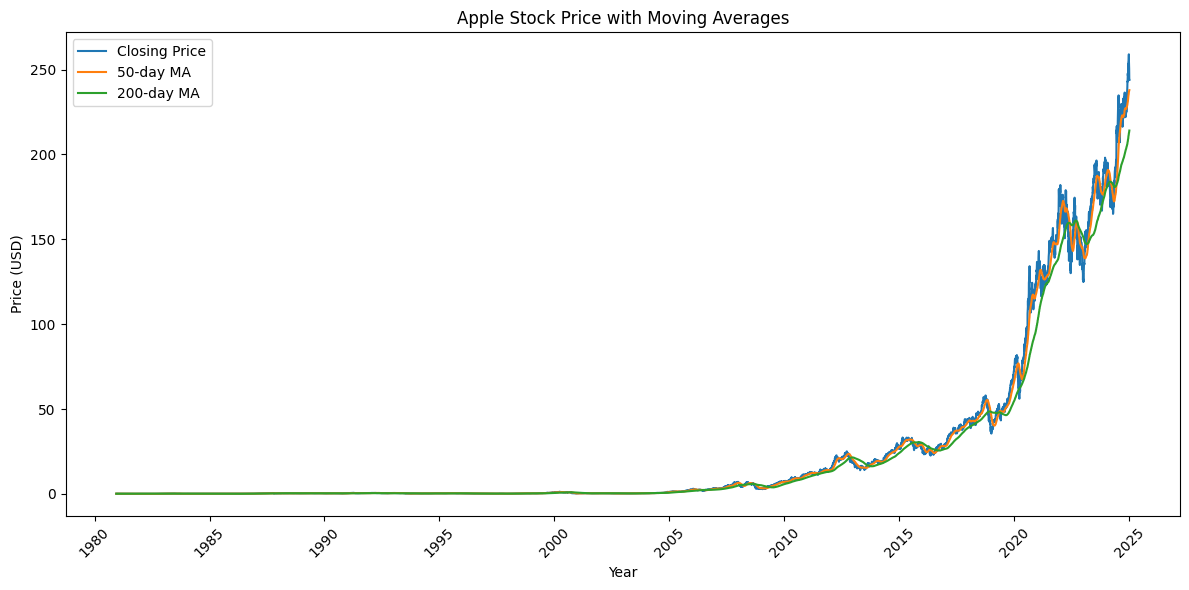

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'],df['Close'],label='Closing Price')
plt.plot(df['Date'],df['MA 50'],label='50-day MA')
plt.plot(df['Date'],df['MA 200'], label='200-day MA')
plt.title('Apple Stock Price with Moving Averages')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Barplot of Date vs Volume

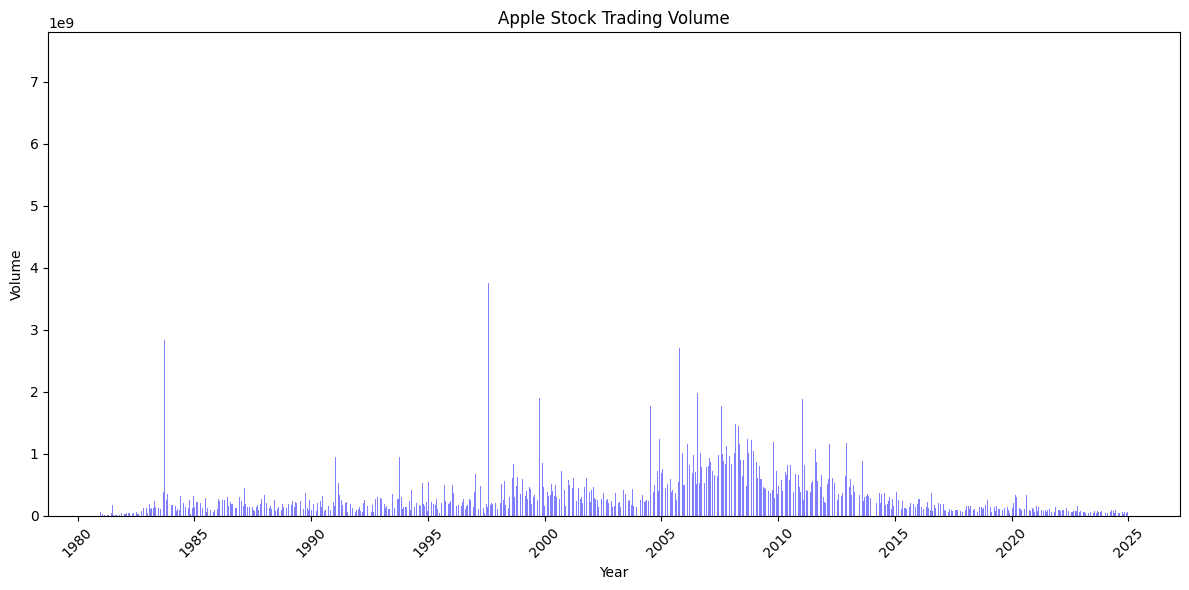

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(df['Date'],df['Volume'], color='b', alpha=0.5)
plt.title('Apple Stock Trading Volume')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Correlation matrix

<Axes: >

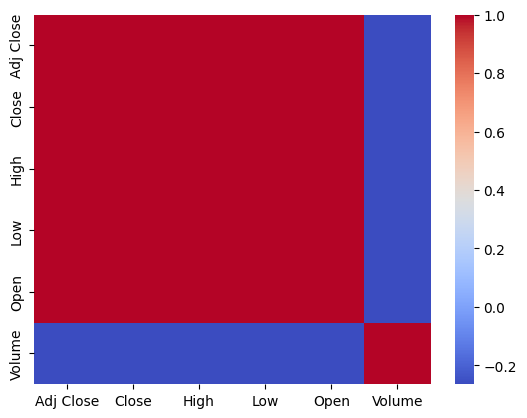

In [ ]:
corr_matrix=df[['Adj Close','Close','High','Low','Open','Volume']].corr()
sns.heatmap(corr_matrix,cmap='coolwarm')

#Label Encoding

In [ ]:
encoder=LabelEncoder()
df['Performance']=encoder.fit_transform(df['Performance'])
df

,Date,Adj Close,Close,High,Low,Open,Volume,MA 50,MA 200,Performance
0,1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600,0.132578,0.118125,1
1,1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800,0.132578,0.118125,0
2,1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000,0.132578,0.118125,0
3,1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600,0.132578,0.118125,1
4,1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600,0.132578,0.118125,1
...,...,...,...,...,...,...,...,...,...,...
11102,2024-12-27,255.589996,255.589996,258.700012,253.059998,257.829987,42355300,236.893599,212.623550,0
11103,2024-12-30,252.199997,252.199997,253.500000,250.750000,252.229996,35557500,237.294599,213.019550,0
11104,2024-12-31,250.419998,250.419998,253.279999,249.429993,252.440002,39480700,237.602999,213.408550,0
11105,2025-01-02,243.850006,243.850006,249.100006,241.820007,248.929993,55558000,237.750399,213.759200,0


In [ ]:
category_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for category, code in category_mapping.items():
    print(f"Category: {category}, Code: {code}")

Category: Loss, Code: 0
Category: Neutral, Code: 1
Category: Profit, Code: 2


#Train_test_split

In [ ]:
X=df[['Date','High','Low','Open','Volume']]
y=df['Close']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=30,test_size=0.2)
X_test_dates=X_test['Date']

In [ ]:
X_train=X_train[['High','Low','Open','Volume']]
X_test=X_test[['High','Low','Open','Volume']]

#Scaling data using Standard Scaler

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#Linear Regression Model

In [ ]:
lrm=LinearRegression()
lrm.fit(X_train,y_train)
y_pred=lrm.predict(X_test)

In [ ]:
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("R2 score:",r2_score(y_test,y_pred))

MAE: 0.11030134525901067
MSE: 0.1036529424708517
R2 score: 0.9999580505864707


#Random Forest Regressor

In [ ]:
rfr=RandomForestRegressor(random_state=30)
rfr.fit(X_train,y_train)
y_pred_rfr=rfr.predict(X_test)

In [ ]:
print("MAE:",mean_absolute_error(y_test,y_pred_rfr))
print("MSE:",mean_squared_error(y_test,y_pred_rfr))
print("R2 score:",r2_score(y_test,y_pred_rfr))

MAE: 0.14767077699987646
MSE: 0.19478981520849895
R2 score: 0.9999211665552883


#Ridge Regression

In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge=ridge_model.predict(X_test)

In [ ]:
print("MAE:",mean_absolute_error(y_test,y_pred_ridge))
print("MSE:",mean_squared_error(y_test,y_pred_ridge))
print("R2 score:",r2_score(y_test,y_pred_ridge))

MAE: 0.15501930925633411
MSE: 0.20802031644553354
R2 score: 0.9999158120351525


#Lasso Regression

In [ ]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
y_pred_lasso=lasso_model.predict(X_test)

In [ ]:
print("MAE:",mean_absolute_error(y_test,y_pred_lasso))
print("MSE:",mean_squared_error(y_test,y_pred_lasso))
print("R2 score:",r2_score(y_test,y_pred_lasso))

MAE: 0.6605364044498035
MSE: 1.1427739053687145
R2 score: 0.999537507628977


#Hyper Parameter Tuning

In [ ]:
param_grid = {'alpha': [0.0001,0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_ridge_model = grid_search.best_estimator_
y_pred_best = best_ridge_model.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)

print(f"Best Mean Squared Error after tuning: {mse_best}")
print(f"Best alpha: {grid_search.best_params_['alpha']}")

results = grid_search.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Alpha: {params['alpha']}, MSE: {-mean_score}")


Best Mean Squared Error after tuning: 0.10372340498692652
Best alpha: 0.001
Alpha: 0.0001, MSE: 0.12003536228793206
Alpha: 0.001, MSE: 0.12002899187668055
Alpha: 0.01, MSE: 0.12008720826967575
Alpha: 0.1, MSE: 0.1277906784048751
Alpha: 1, MSE: 0.20529658686861238
Alpha: 10, MSE: 0.26258833500881607
Alpha: 100, MSE: 0.3298145136649304


In [ ]:
ridge_model_tuned = Ridge(alpha=0.001)
ridge_model_tuned.fit(X_train, y_train)
y_pred_ridge_tuned=ridge_model_tuned.predict(X_test)

In [ ]:
print("MAE:",mean_absolute_error(y_test,y_pred_ridge_tuned))
print("MSE:",mean_squared_error(y_test,y_pred_ridge_tuned))
print("R2 score:",r2_score(y_test,y_pred_ridge_tuned))

MAE: 0.1103793288000284
MSE: 0.10372340498692652
R2 score: 0.9999580220695645


#Model Comparison

Mean Squared Error

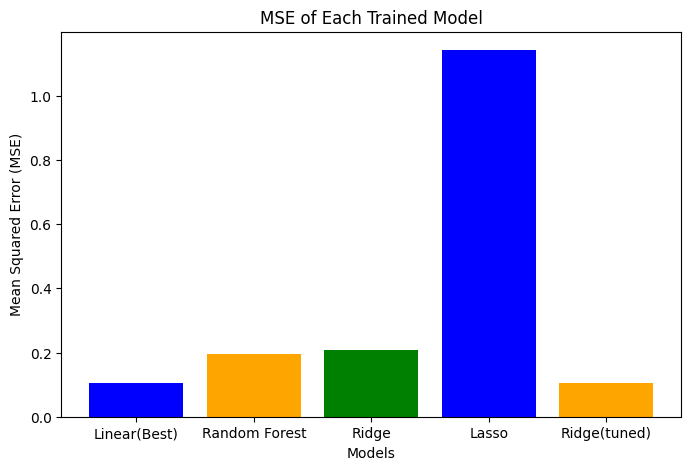

In [ ]:
models=['Linear(Best)','Random Forest','Ridge','Lasso','Ridge(tuned)']
mse_values=[0.1036529424708517,0.19478981520849895,0.20802031644553354,1.1427739053687145,0.10372340498692652]
plt.figure(figsize=(8, 5))
plt.bar(models, mse_values, color=['blue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE of Each Trained Model')
plt.show()

Mean Absolute Error

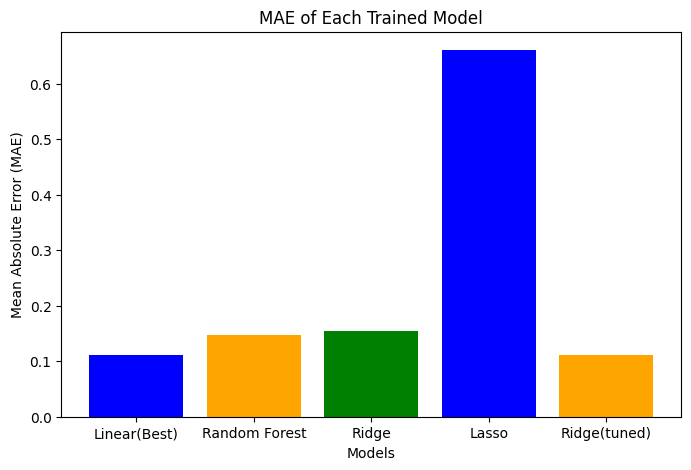

In [ ]:
models=['Linear(Best)','Random Forest','Ridge','Lasso','Ridge(tuned)']
mae_values=[0.11030134525901067,0.14767077699987646,0.15501930925633411,0.6605364044498035,0.1103793288000284]
plt.figure(figsize=(8, 5))
plt.bar(models, mae_values, color=['blue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE of Each Trained Model')
plt.show()

R2 Score

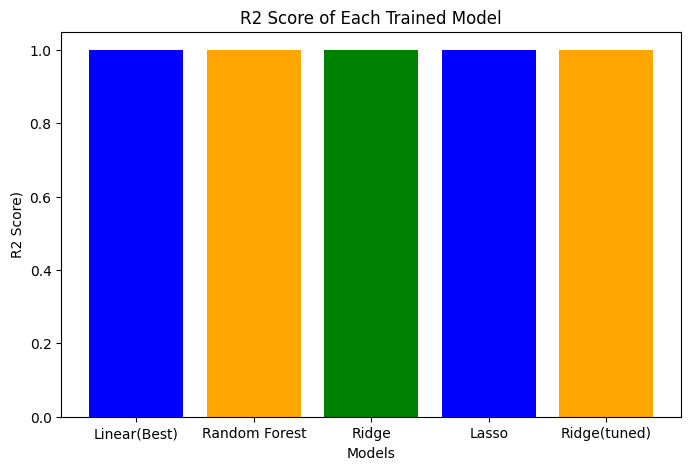

In [ ]:
models=['Linear(Best)','Random Forest','Ridge','Lasso','Ridge(tuned)']
r2_values=[0.9999580505864707,0.9999211665552883,0.9999158120351525,0.999537507628977,0.9999580220695645]
plt.figure(figsize=(8, 5))
plt.bar(models, r2_values, color=['blue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('R2 Score)')
plt.title('R2 Score of Each Trained Model')
plt.show()

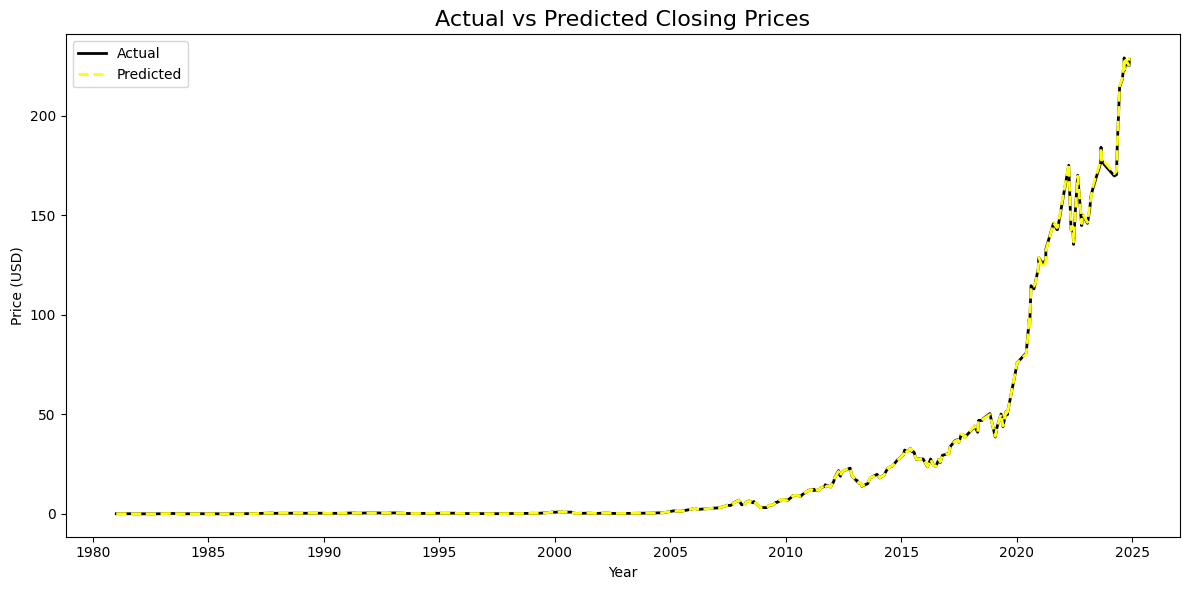

In [ ]:
dates=X_test_dates
combined_df = pd.DataFrame({'Date': dates[::5], 'Actual': y_test[::5], 'Predicted': y_pred[::5]})
combined_df = combined_df.sort_values('Date')
plt.figure(figsize=(12, 6))
plt.plot(combined_df['Date'],combined_df['Actual'] , label='Actual', color='black', linewidth=2)
plt.plot(combined_df['Date'],combined_df['Predicted'], label='Predicted', color='yellow', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Closing Prices', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()

#Result
Linear Regression model has the best MSE score.